In [62]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

%matplotlib notebook

<IPython.core.display.Javascript object>


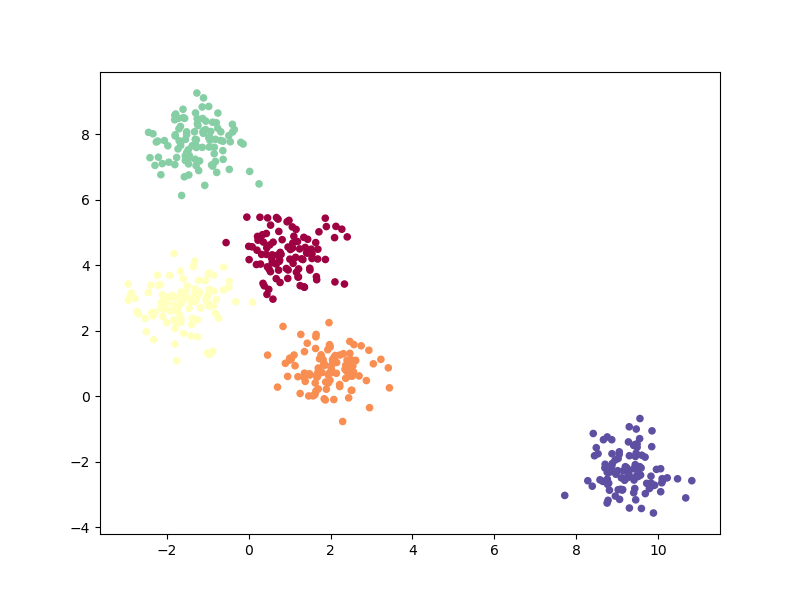

In [63]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

<IPython.core.display.Javascript object>


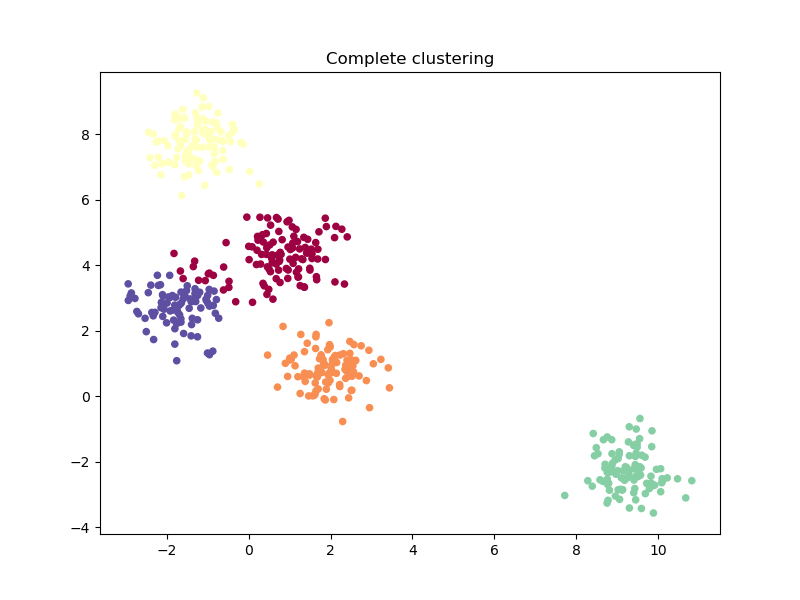

In [64]:
#Agglomerative clustering with complete linkage
clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete')  
predicted = clf.fit_predict(X)
plt.figure(figsize=(8,6))
plt.title("Complete clustering")
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s= 20)

<IPython.core.display.Javascript object>


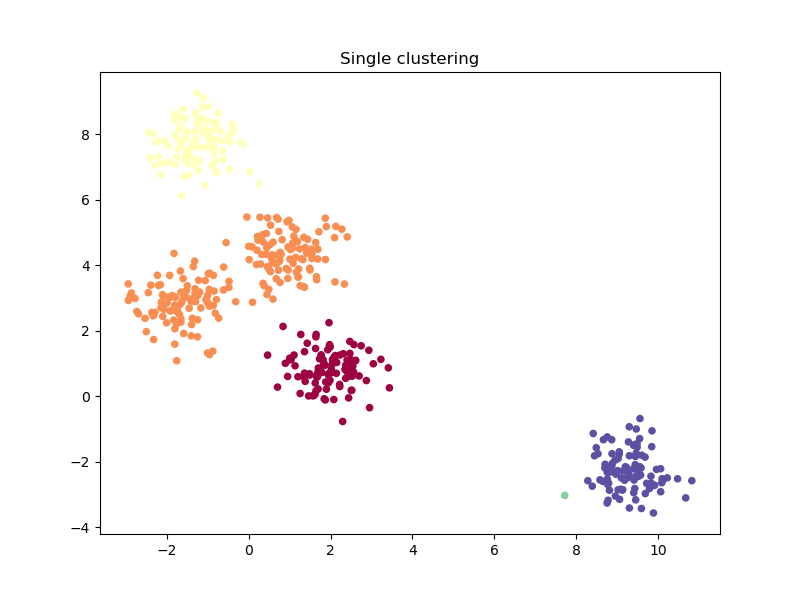

In [69]:
#Agglomerative clustering with single linkage
clf = AgglomerativeClustering(n_clusters=5, linkage= 'single')  
predicted = clf.fit_predict(X)

plt.figure(figsize=(8,6))
plt.title("Single clustering")
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s= 20)

<IPython.core.display.Javascript object>


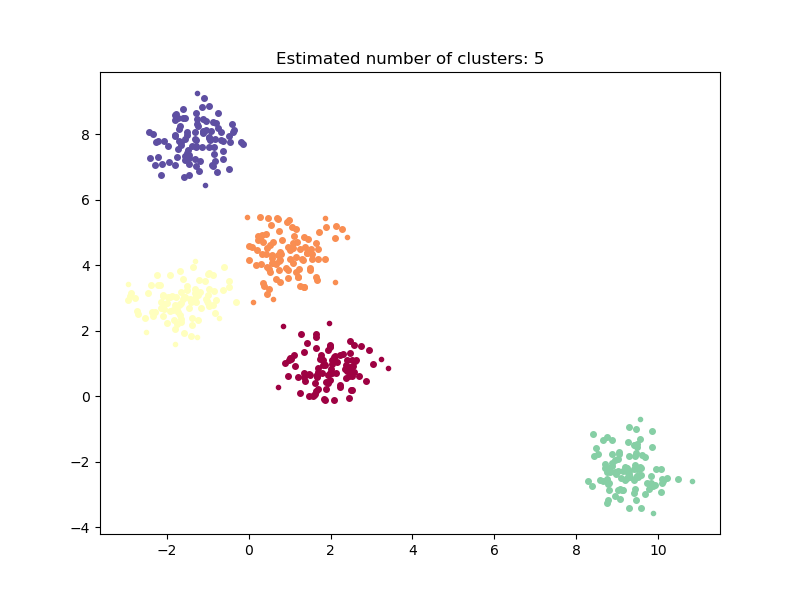

In [66]:
#DBSCAN
db = DBSCAN().fit(X)
predicted = db.labels_

unique_labels = set(predicted)
core_samples_mask = np.zeros_like(predicted, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor=tuple(col), markersize=4,)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor=tuple(col), markersize=3,)

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()